In [1]:
from IPython.display import display, HTML, Image

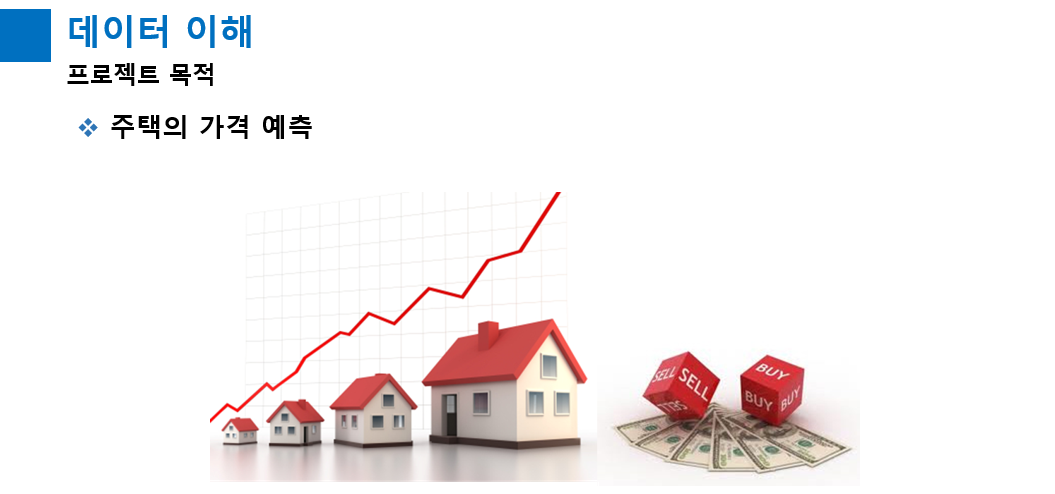

In [2]:
#<img src='C:/Users/AERO/Desktop/AI_practice/Decision Tree/for_markdown/9.png'>
Image('C:/Users/AERO/Desktop/AI_practice/Decision Tree/for_markdown/9.png')

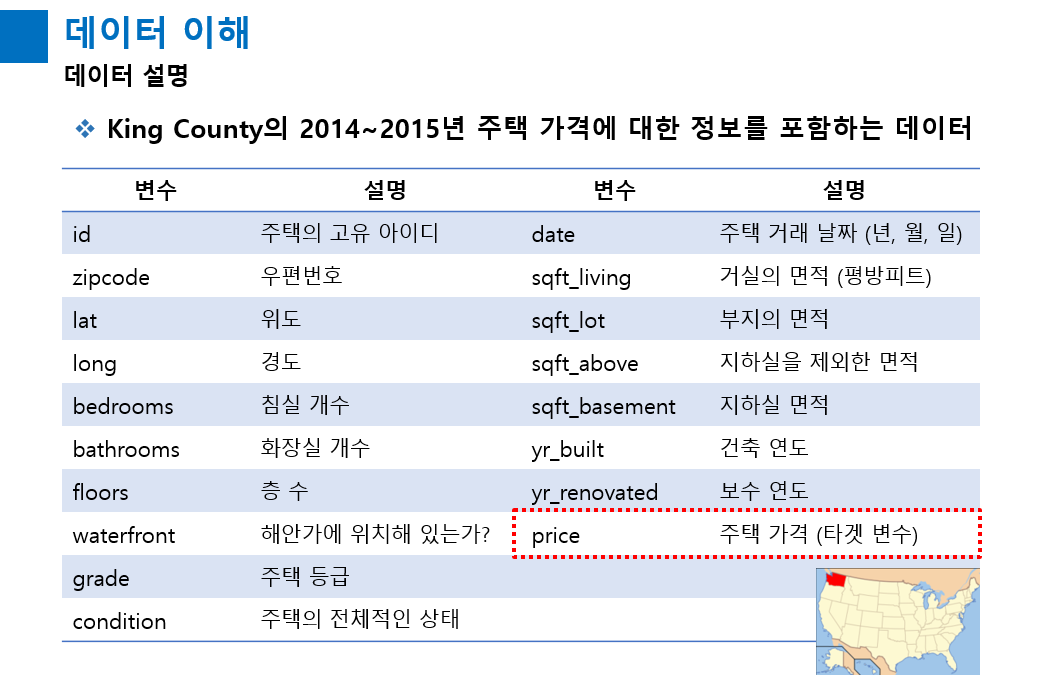

In [3]:
#<img src='.\Decision Tree\for_markdown\10.png'>
Image('C:/Users/AERO/Desktop/AI_practice/Decision Tree/for_markdown/10.png')

In [6]:
# 관련 모듈 부르기 및 시각화를 위한 셋팅
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 


In [7]:
# 데이터 불러오기

data = pd.read_csv('.\kc_house_data.csv')

In [8]:
data.head()

,id,zipcode,lat,long,bedrooms,bathrooms,floors,waterfront,grade,condition,date,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,9106000005,98115,47.6747,-122.303,4,2.25,2.0,1,8,5,20150527,3750,5000,2440,1310,1924,0,1310000
1,5101400871,98115,47.6914,-122.308,2,1.75,1.0,1,6,3,20150524,1390,6670,720,670,1941,0,445500
2,7923600250,98007,47.5951,-122.144,5,2.00,1.5,1,7,3,20150515,1870,7344,1870,0,1960,0,450000
3,4166600610,98023,47.3273,-122.370,3,2.00,1.0,1,7,4,20150514,1410,44866,1410,0,1985,0,335000
4,5057100110,98042,47.3584,-122.163,5,3.00,2.0,1,9,3,20150514,3223,6371,3223,0,2014,0,479349


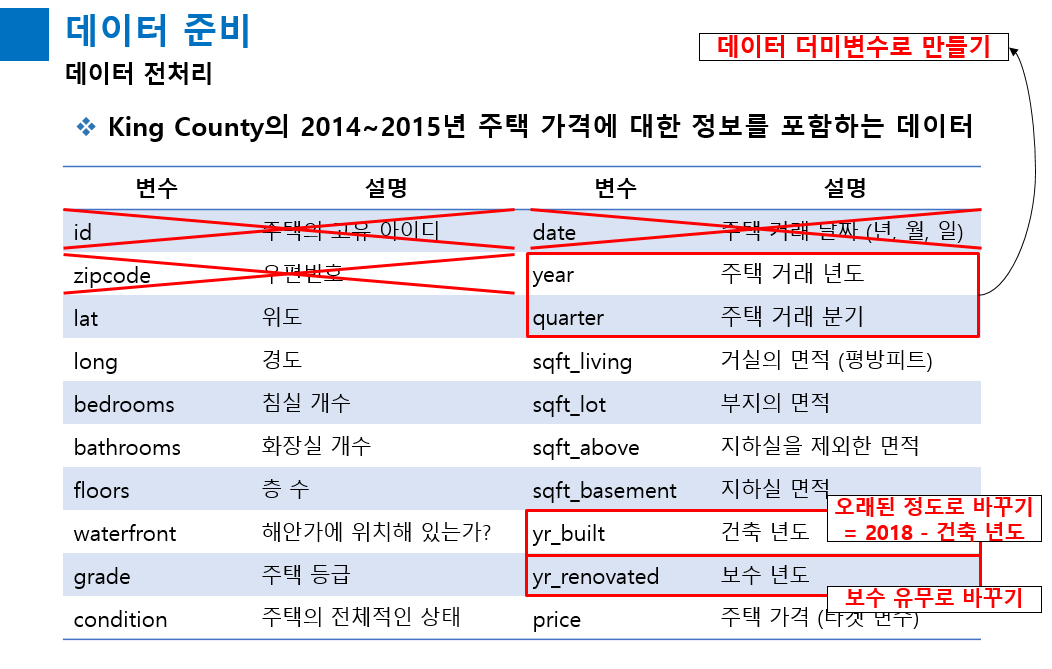

In [9]:
Image('C:/Users/AERO/Desktop/AI_practice/Decision Tree/for_markdown/13.png')

In [10]:
data = data.drop(['id','zipcode'],axis=1)

In [11]:
data['date'].head(15)

0     20150527
1     20150524
2     20150515
3     20150514
4     20150514
5     20150514
6     20150514
7     20150514
8     20150514
9     20150514
10    20150514
11    20150514
12    20150514
13    20150514
14    20150513
Name: date, dtype: int64

In [12]:
year = []
for i in range(data.shape[0]):
    year.append(str(data.loc[i,'date'])[:4])

quarter = []
for i in range(data.shape[0]):    
    quarter.append(int(str(data.loc[i,'date'])[4:6])//4)
    
data['year'] = pd.Series(year)
data['quarter'] = pd.Series(quarter)

In [13]:
data[['year','quarter']].head(15)

,year,quarter
0,2015,1
1,2015,1
2,2015,1
3,2015,1
4,2015,1
5,2015,1
6,2015,1
7,2015,1
8,2015,1
9,2015,1


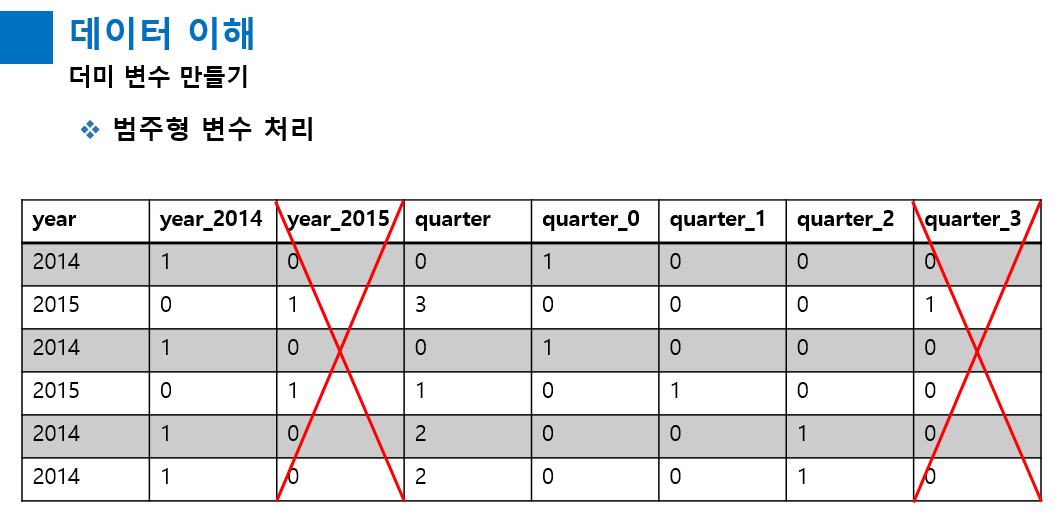

In [14]:
#<img src='for_markdown/14.png'>
Image('C:/Users/AERO/Desktop/AI_practice/Decision Tree/for_markdown/14.png')

In [15]:
data = pd.get_dummies(data,columns=['year','quarter'])
data = data.drop(['date'], axis=1)

In [16]:
data.columns

Index(['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'price', 'year_2014', 'year_2015',
       'quarter_0', 'quarter_1', 'quarter_2', 'quarter_3'],
      dtype='object')

In [17]:
data = data.drop(['year_2015','quarter_3'],axis=1)

In [18]:
data['yr_built'] = 2018-data['yr_built']

In [19]:
np.unique(data['yr_renovated'],return_counts=True)

(array([   0, 1940, 1944, 1945, 1946, 1950, 1951, 1953, 1955, 1956, 1957,
        1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015], dtype=int64),
 array([15722,     2,     1,     1,     2,     2,     1,     2,     1,
            1,     3,     3,     1,     3,     2,     4,     5,     4,
            2,     6,     2,     7,     1,     3,     5,     2,     5,
            3,     7,     4,     8,     9,     4,     7,    12,    14,
           13,    12,    14,     8,    19,    19,    16,    12,    14,
           13,    13,    12,    11,    13,    14,    25,    13,    13,
           24,    21,    25,    18,    26,    16,    14,    12,     7,
            9,    17,    66,  

In [20]:
data.loc[data['yr_renovated'] == 0,'yr_renovated'] = 0
data.loc[data['yr_renovated'] != 0,'yr_renovated'] = 1

In [21]:
data = data[['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated','year_2014', 'quarter_0', 'quarter_1', 'quarter_2','price']]

In [22]:
data.head()

,lat,long,bedrooms,bathrooms,floors,waterfront,grade,condition,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,year_2014,quarter_0,quarter_1,quarter_2,price
0,47.6747,-122.303,4,2.25,2.0,1,8,5,3750,5000,2440,1310,94,0,0,0,1,0,1310000
1,47.6914,-122.308,2,1.75,1.0,1,6,3,1390,6670,720,670,77,0,0,0,1,0,445500
2,47.5951,-122.144,5,2.00,1.5,1,7,3,1870,7344,1870,0,58,0,0,0,1,0,450000
3,47.3273,-122.370,3,2.00,1.0,1,7,4,1410,44866,1410,0,33,0,0,0,1,0,335000
4,47.3584,-122.163,5,3.00,2.0,1,9,3,3223,6371,3223,0,4,0,0,0,1,0,479349


In [23]:
data.to_csv('preprocessed_kc_house_data.csv')

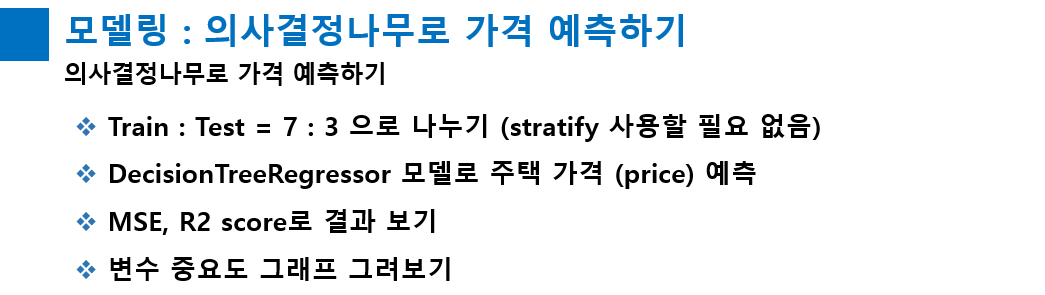

In [24]:
#<img src='for_markdown/15.png'>
Image('C:/Users/AERO/Desktop/AI_practice/Decision Tree/for_markdown/15.png')

In [25]:
X = data.drop(['price'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=2017020558)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
dt_reg = DecisionTreeRegressor(criterion="mse",
                               max_depth=4,
                               random_state=2017020558)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=2017020558)

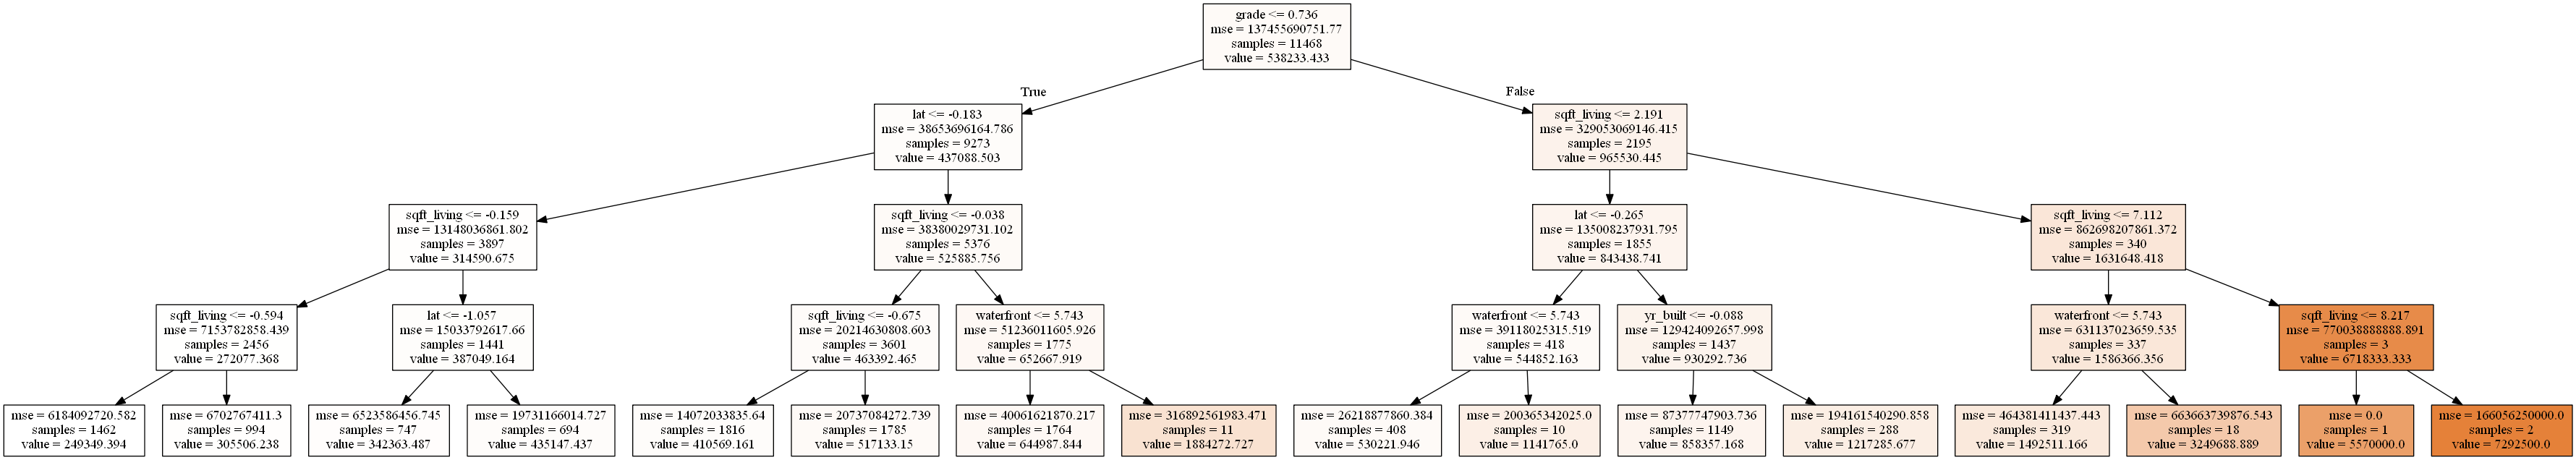

In [30]:
graph = Source(export_graphviz(dt_reg,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))

In [38]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 182.6914
- MSE (Test) : 30976517619.4825
- R square (Train)      : 1.0000
- R square (Test) : 0.7541


In [39]:
dt_reg = DecisionTreeRegressor(criterion="mse",
                               max_depth=10,
                               random_state=2017020558)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=2017020558)

In [40]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 11153722077.3298
- MSE (Test) : 25742152574.8765
- R square (Train)      : 0.9189
- R square (Test) : 0.7956


In [41]:
imp = dt_reg.feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

      variables importance
8         grade   0.375291
11  sqft_living   0.260134
2           lat   0.161382
7    waterfront    0.06338
3          long   0.050495
15     yr_built   0.028374
13   sqft_above   0.015163
1       zipcode   0.012983
12     sqft_lot   0.010853


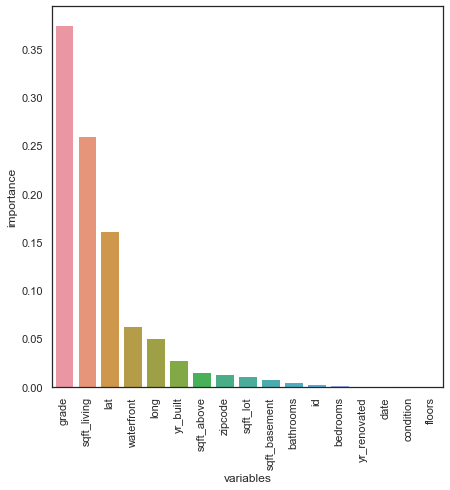

In [42]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

C:\Users\AERO\Anaconda3\envs\AI_lecture\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AERO\Anaconda3\envs\AI_lecture\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AERO\Anaconda3\envs\AI_lecture\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AERO\Anaconda3\envs\AI_lecture\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AERO\Anaconda3\envs\AI_lecture\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AERO\Anaconda3\envs\AI_lecture\lib\site-p

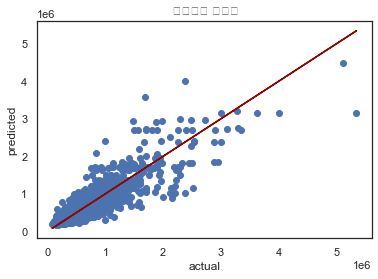

In [44]:
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r-')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(' 실제값과 예측값')
plt.show()